# Plot wind data from Neah Bay DFO buoy 46206

About 50 km north of Barkley Canyon

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as pldates
import scipy.signal as sig
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

In [30]:
# import data

ds = xr.open_dataset(f'../../../Data/wind/wind.nc')
    
#print(ds)

In [3]:
# select data

year = 2013
t_stamp = f'{year}'
start_date = np.datetime64(f'{year}-01-01')
end_date = np.datetime64(f'{year+1}-01-01')

if year == 2013:
    dt_tot = ds.dt2013
    wdir_tot = ds.wdir2013
    wspd_tot = ds.wspd2013
elif year == 2014:
    dt_tot = ds.dt2014
    wdir_tot = ds.wdir2014
    wspd_tot = ds.wspd2014
elif year == 2017:
    dt_tot = ds.dt2017
    wdir_tot = ds.wdir2017
    wspd_tot = ds.wspd2017
elif year == 2018:
    dt_tot = ds.dt2018
    wdir_tot = ds.wdir2018
    wspd_tot = ds.wspd2018

In [4]:
# get data segments in lists

if year == 2013:
    dt0 = dt_tot[:]
    dt = [dt0]
    wspd0 = wspd_tot[:]
    wspd = [wspd0]
    wdir0 = wdir_tot[:]
    wdir = [wdir0]
    n_seg = 1
elif year == 2014:
    dt0 = dt_tot[:621]
    dt1 = dt_tot[621:]
    dt = [dt0,dt1]
    wspd0 = wspd_tot[:621]
    wspd1 = wspd_tot[621:]
    wspd = [wspd0,wspd1]
    wdir0 = wdir_tot[:621]
    wdir1 = wdir_tot[621:]
    wdir = [wdir0,wdir1]
    n_seg = 2
elif year == 2017:
    dt0 = dt_tot[:3974]
    dt1 = dt_tot[3974:5018]
    dt2 = dt_tot[5018:]
    dt = [dt0,dt1,dt2]
    wspd0 = wspd_tot[:3974]
    wspd1 = wspd_tot[3974:5018]
    wspd2 = wspd_tot[5018:]
    wspd = [wspd0,wspd1,wspd2]
    wdir0 = wdir_tot[:3974]
    wdir1 = wdir_tot[3974:5018]
    wdir2 = wdir_tot[5018:]
    wdir = [wdir0,wdir1,wdir2]
    n_seg = 3
elif year == 2018:
    dt0 = dt_tot[:]
    dt = [dt0]
    wspd0 = wspd_tot[:]
    wspd = [wspd0]
    wdir0 = wdir_tot[:]
    wdir = [wdir0]
    n_seg = 1

## Wind speed and direction plots

In [5]:
# smooth wind speeds

n = 5                              # reduce data
N = 701                             # smooth window
o = 2                               # filter order

wspd_s,wspd_n,dt_n = [],[],[]
for i in range(n_seg):
    wspd_st = sig.savgol_filter(wspd[i].values,N,o,mode='nearest')   # smoothed wind speed series
    wspd_nt = wspd_st[::n]                  # reduced wind speed series
    dt_t = dt[i].values                     # segment time stamps
    dt_nt = dt_t[::n]                       # reduced time stamps, numpy.datetime64
    wspd_s.append(wspd_st)
    wspd_n.append(wspd_nt)
    dt_n.append(dt_nt)

In [6]:
# smooth directions

N = 1501                             # smooth window
o = 2     

u_n,v_n = [],[]
for i in range(n_seg):
    deg_dir = 270 - wdir[i].values            # wind direction, degrees
    rad_dir = np.radians(deg_dir)             # wind diretion, radians
    u = wspd[i].values*np.cos(rad_dir)        # u wind velocity vector
    v = wspd[i].values*np.sin(rad_dir)        # v wind velocity vector
    u_s = sig.savgol_filter(u,N,o,mode='nearest')
    v_s = sig.savgol_filter(v,N,o,mode='nearest')
    u_nt = u_s[::n] / np.sqrt(u_s[::n]**2 + v_s[::n]**2)
    v_nt = v_s[::n] / np.sqrt(u_s[::n]**2 + v_s[::n]**2)
    u_n.append(u_nt)
    v_n.append(v_nt)

In [7]:
# make quiver grid

x,y = [],[]
for i in range(n_seg):
    if i == 0:
        count = len(dt_n[i])
        xt = np.arange(0,count+1,1)         # x coords
        yt = np.zeros(len(xt))              # y coords
        x.append(xt)
        y.append(yt)
    elif i > 0:
        count = len(dt_n[i])
        prev = len(dt_n[i-1])
        xt = np.arange(prev,prev+count+1,1)
        yt = np.zeros(len(xt))
        x.append(xt)
        y.append(yt)

<IPython.core.display.Javascript object>


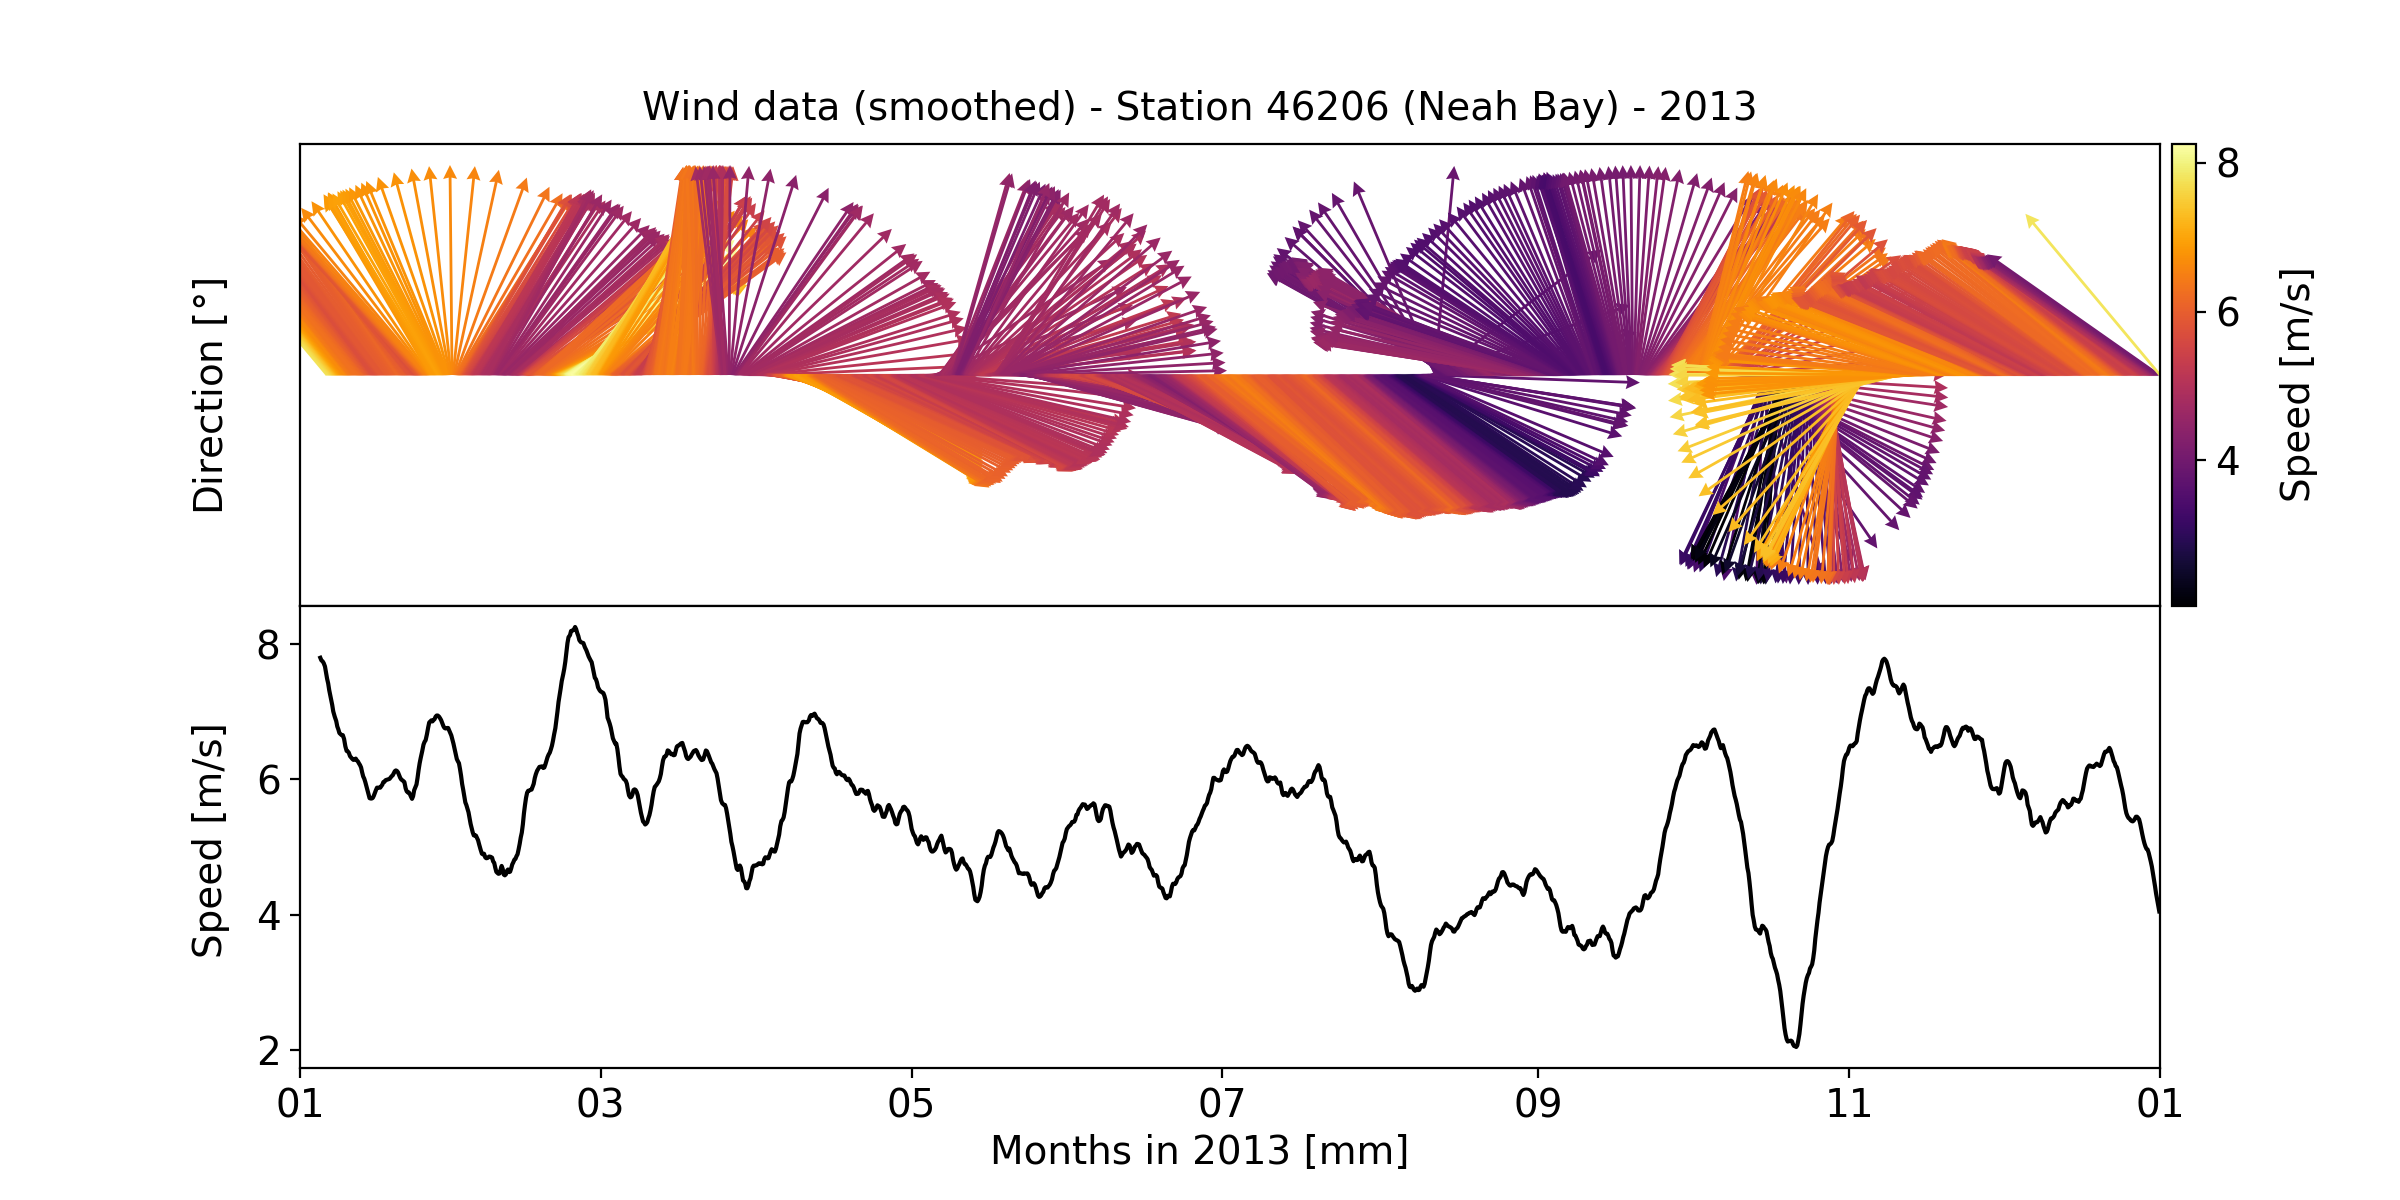

In [8]:
# plot smoothed data

fig, (ax0,ax1) = plt.subplots(2,1,figsize=(12,6),gridspec_kw={'height_ratios':[1,1]})
fig.subplots_adjust(hspace = 0)
fig.text(0.5, 0.9, f'Wind data (smoothed) - Station 46206 (Neah Bay) - {t_stamp}', ha='center', fontsize=14)
fig.text(0.08, 0.67, 'Direction [$\degree$]', va='center', rotation='vertical',fontsize=14)
fig.text(0.08, 0.3, 'Speed [m/s]', va='center', rotation='vertical',fontsize=14)
fig.text(0.95, 0.68, 'Speed [m/s]', va='center', rotation='vertical',fontsize=14)
fig.text(0.5, 0.03, f'Months in {t_stamp} [mm]', ha='center',fontsize=14)

ccmap = 'inferno'
for i in range(n_seg):
    if year == 2013:
        ax0.quiver(x[i],y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        ax0.set_xlim(-25,x[0][-1])
        ax1.plot(dt_n[i], wspd_n[i], color='black')
    elif year == 2014:
        if i == 1:
            ax0.quiver((x[i]*0.75)+324,y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        else:
            ax0.quiver(x[i]*0.75,y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        ax0.set_xlim(x[0][0],x[1][-1])
        ax1.plot(dt_n[i], wspd_n[i], color='black')
    elif year == 2017:
        if i == 1:
            ax0.quiver((x[i]*0.31)+20,y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        elif i == 2:
            ax0.quiver((x[i]*0.31)+337,y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        else:
            ax0.quiver(x[i]*0.33,y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        ax0.set_xlim(x[0][0],x[2][-1])
        ax1.plot(dt_n[i], wspd_n[i], color='black')
    elif year == 2018:
        ax0.quiver(x[i]*0.55,y[i],u_n[i],v_n[i],wspd_n[i],angles='uv',scale_units='y',scale=1,width=0.0015,headwidth=5,cmap=ccmap)
        ax0.set_xlim(x[0][0],x[0][-1])
        ax1.plot(dt_n[i], wspd_n[i], color='black')
    
cbaxes = fig.add_axes([0.905,0.495,0.01,0.385])
norm = colors.Normalize()
norm.autoscale(wspd_n[0])
cm = matplotlib.cm.inferno
sm = matplotlib.cm.ScalarMappable(cmap=cm,norm=norm)
sm.set_array([])
cbar0 = plt.colorbar(sm,cax=cbaxes, fraction=0.05, pad=0.01, aspect=15)
cbar0.ax.tick_params(labelsize=14)

ax0.set_ylim(-1.1,1.1)
ax0.tick_params(axis='both',left=None,labelleft=None,bottom=None,labelbottom=None)
date_form = pldates.DateFormatter("%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlim(start_date,end_date)
ax1.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./wind_{t_stamp}.pdf',format='pdf')

## CW wind spectra

In [9]:
# spectra data adjustments & Welch parameters

time_total = 0
for i in range(n_seg):
    time_total += len(dt[i])
print('Total time length:',time_total)

# set Welch parameters for PSD

fs = 2.7777e-4                # 4 samples per HOUR, 1.11e-3 per SECOND
win = 'hann'                  # optimal window for averaging
nps = 256                     # find optimal window for nperseg (1024 ~10 days)
overlap = 0.9 * nps           # 50% overlap, default   

# remove short segments

t_short = []
for i in range(n_seg):
    if len(dt[i]) < nps:
        t_short.append(i)
for i in sorted(t_short, reverse=True):
    del dt[i]
n_seg = n_seg - len(t_short)

time_total = 0
for i in range(n_seg):
    time_total += len(dt[i])
print(len(t_short),'segment(s) too short, new total time length:',time_total)

Total time length: 8499
0 segment(s) too short, new total time length: 8499


In [10]:
# convert wind-speed and direction to u and v vectors

u,v = [],[]
for i in range(n_seg):
    deg_dir = 270 - wdir[i].values            # wind direction, degrees
    rad_dir = np.radians(deg_dir)             # wind diretion, radians
    u_temp = wspd[i].values*np.cos(rad_dir)        # u wind velocity vector
    v_temp = wspd[i].values*np.sin(rad_dir)        # v wind velocity vector
    u.append(u_temp)
    v.append(v_temp)

In [11]:
# remove mean

um,vm = [],[]
for i in range(n_seg):
    um_temp = np.copy(u[i]) - np.nanmean(u[i])
    vm_temp = np.copy(v[i]) - np.nanmean(v[i])
    um.append(um_temp)     # list[segment][depth][time]
    vm.append(vm_temp)     # 0 is upper depth index

In [12]:
def spectrocross(u,v,fs,window,nperseg,noverlap,nfft,detrend,return_onesided,scaling,axis,mode):
    freqs, time, Sxy = sig._spectral_helper(u, v, fs, window, nperseg,
                                            noverlap, nfft, detrend,
                                            return_onesided, scaling, axis,
                                            mode='psd')        # get this from scipy spectral.py in pkgs (add name to import list)
    return freqs, time, Sxy

In [13]:
# get rotary spectrograms

Scw,Sccw,f,ft = [],[],[],[]
for i in range(n_seg):
    u_f, u_t, u_Sxx = sig.spectrogram(um[i], fs=fs, window=win, \
                                                            nperseg = nps, noverlap = overlap, return_onesided=True)
    v_f, v_t, v_Sxx = sig.spectrogram(vm[i], fs=fs, window=win, \
                                                            nperseg = nps, noverlap = overlap, return_onesided=True)
    uv_f,uv_t,uv_Cxy = spectrocross(vm[i],um[i],fs=fs,window=win,nperseg=nps,noverlap=overlap,nfft=None,detrend='constant',
                    return_onesided=True,scaling='density',axis=-1,mode='psd')     # cross spectrogram
    Sxyuv = uv_Cxy.imag                             # quadrature spectra is imag part of cross spectra
    Scw_temp = ((u_Sxx + v_Sxx) - (2*Sxyuv)) / 2         # rotatory components
    Sccw_temp = ((u_Sxx + v_Sxx) + (2*Sxyuv)) / 2 
    
    # convert spectro_t to datetime for x-axis on plots for PSD
    spectro_t4 = u_t*fs
    spectro_time_len = len(spectro_t4)
    spectro_time_axis = np.zeros([spectro_time_len],dtype='datetime64[s]')
    for k in range(spectro_time_len):
        j = np.int(spectro_t4[k])
        spectro_time_axis[k] = dt[i][j].values
        
    Scw.append(Scw_temp)
    Sccw.append(Sccw_temp)
    f.append(u_f)
    ft.append(spectro_time_axis)

<IPython.core.display.Javascript object>


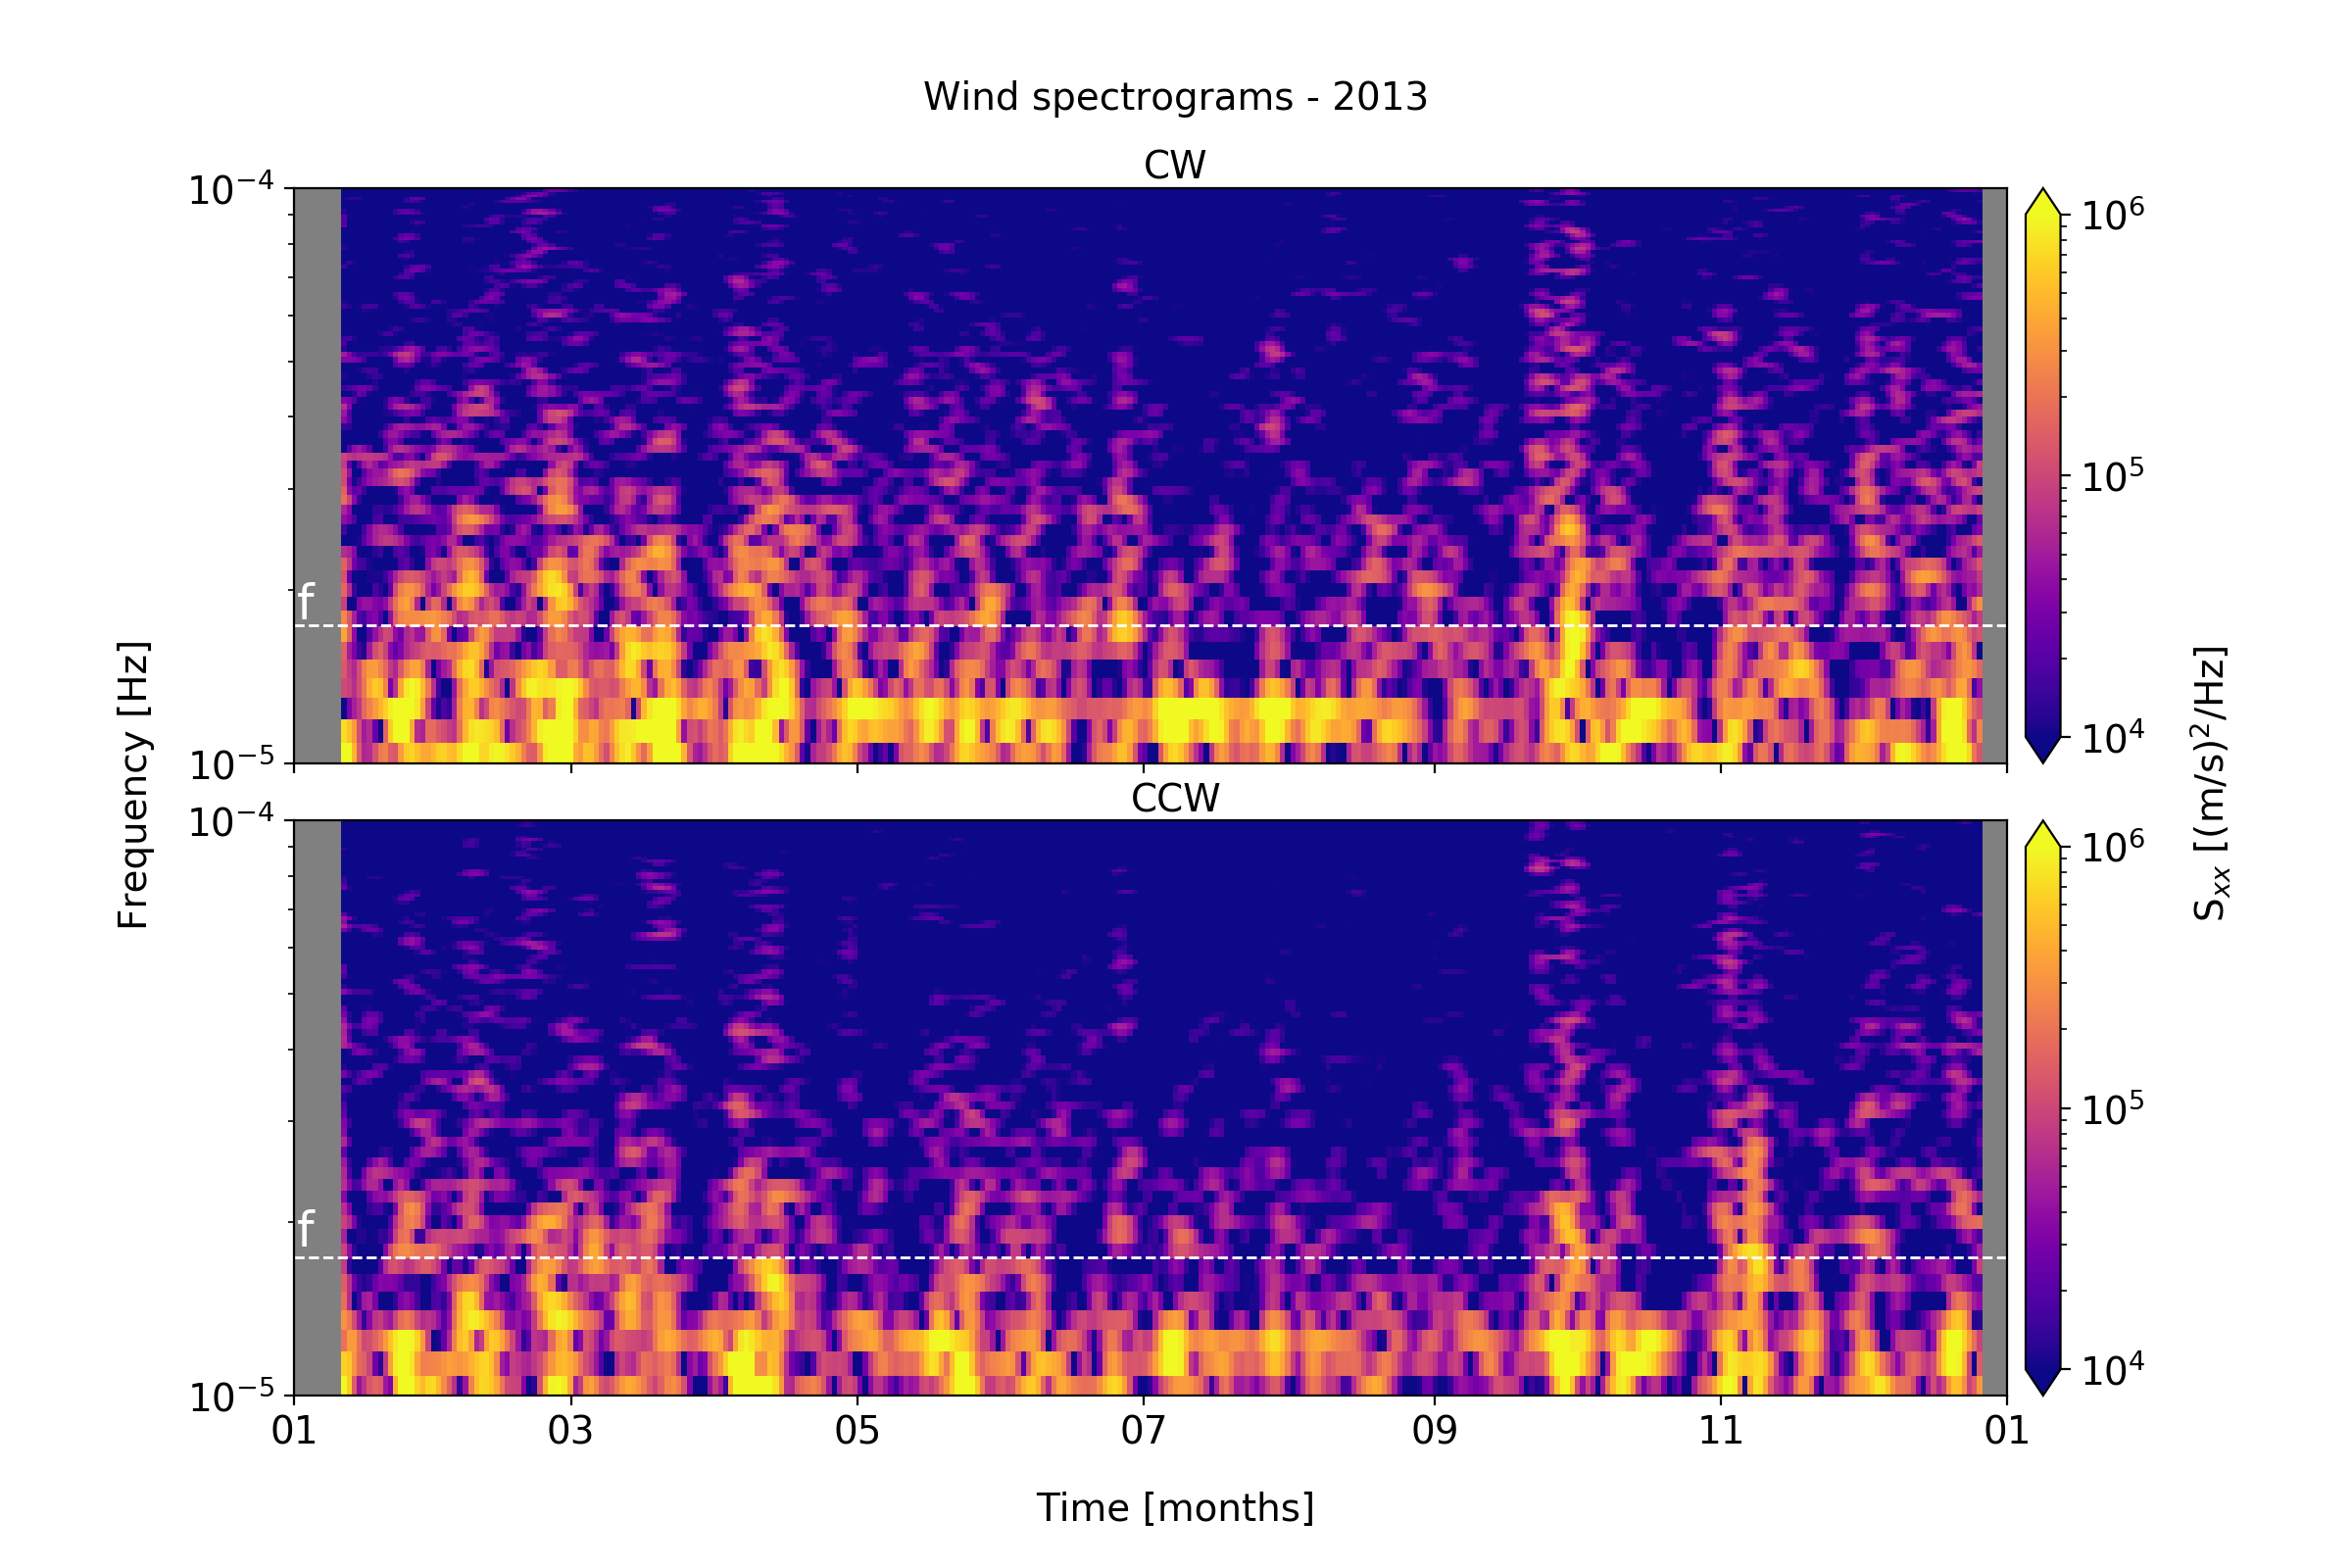

In [14]:
# plot spectrogram

fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(12,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1)
fig.text(0.5, 0.93, f'Wind spectrograms - {t_stamp}', ha='center', fontsize=14)
fig.text(0.05, 0.5, 'Frequency [Hz]', va='center', rotation='vertical', fontsize=14)
fig.text(0.93, 0.5, 'S$_{xx}$ [(m/s)$^2$/Hz]', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.03, f'Time [months]', ha='center',fontsize=14)
    
fig.text(0.5, 0.886, 'CW', ha='center', fontsize=14)
fig.text(0.5, 0.482, 'CCW', ha='center', fontsize=14)
fig.text(0.13, 0.205, 'f', ha='center', fontsize=18, color='white',zorder=4)
fig.text(0.13, 0.605, 'f', ha='center', fontsize=18, color='white',zorder=4)
vmin = 1e4
vmax = 1e6
ax0.axhline(1.74e-5,color='white',ls='--',lw=1)
ax1.axhline(1.74e-5,color='white',ls='--',lw=1)

for i in range(n_seg):
    im0 = ax0.pcolormesh(ft[i], f[0], Scw[i], rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma')  
    im1 = ax1.pcolormesh(ft[i], f[0], Sccw[i], rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma')  

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=15, extend='both')   
cbar0.ax.tick_params(labelsize=14)
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=15, extend='both')   
cbar1.ax.tick_params(labelsize=14)

ax0.patch.set_facecolor('grey')
ax1.patch.set_facecolor('grey')

ax1.set_yscale('log')
ax1.set_ylim(1e-5,1e-4)
date_form = pldates.DateFormatter("%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlim(start_date,end_date)
ax1.tick_params(labelsize=14)
ax0.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./wind_spectro_{t_stamp}.pdf',format='pdf')

In [15]:
# integrate at each time step

Scw_int, Sccw_int = [],[]

for i in range(n_seg):
    Scw_int_temp = []
    Scw_np = np.copy(Scw[i])
    Sccw_int_temp = []
    Sccw_np = np.copy(Sccw[i])
    for j in range(len(Scw_np[0,:])):      
        Scw_int_temp.append(np.trapz(y=Scw_np[14:19,j],x=f[0][14:19]))
    for j in range(len(Sccw_np[0,:])):      
        Sccw_int_temp.append(np.trapz(y=Sccw_np[14:19,j],x=f[0][14:19]))
    Scw_int.append(np.asarray(Scw_int_temp))
    Sccw_int.append(np.asarray(Sccw_int_temp))

<IPython.core.display.Javascript object>


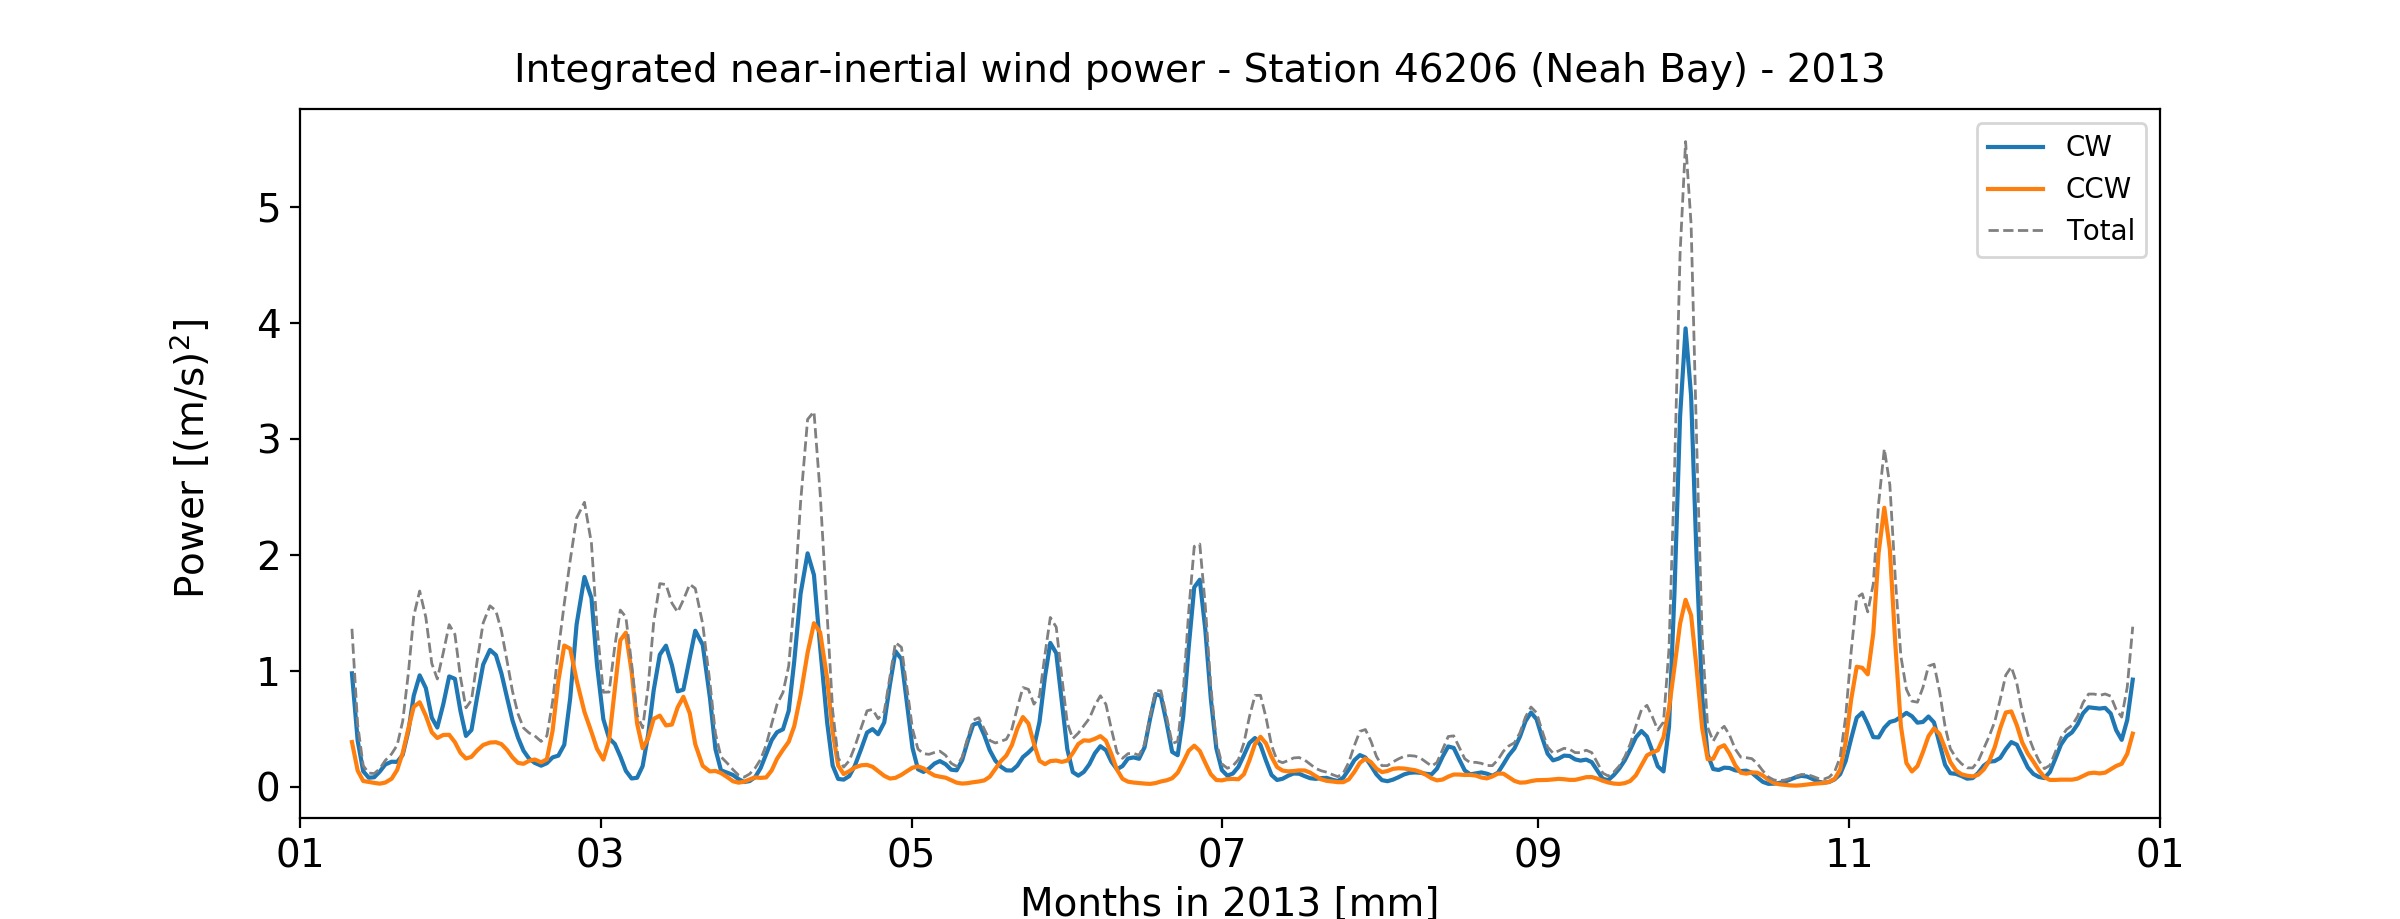

In [16]:
# plot band-passed integrated rotary data

fig, ax0 = plt.subplots(1,1,figsize=(12,4.6),sharex=True,sharey=True)
fig.text(0.5, 0.91, f'Integrated near-inertial wind power - Station 46206 (Neah Bay) - {t_stamp}', ha='center', fontsize=14)

for i in range(n_seg):
    if i == 0:
        ax0.plot(ft[i],Scw_int[i],color='tab:blue',label='CW')
        ax0.plot(ft[i],Sccw_int[i],color='tab:orange',label='CCW')
        ax0.plot(ft[i],Scw_int[i][:]+Sccw_int[i][:],color='grey',ls='--',lw=1,label='Total')
    elif i > 0:
        ax0.plot(ft[i],Scw_int[i],color='tab:blue')
        ax0.plot(ft[i],Sccw_int[i],color='tab:orange')
        ax0.plot(ft[i],Scw_int[i][:]+Sccw_int[i][:],color='grey',ls='--',lw=1)
        
ax0.set_xlabel(f'Months in {t_stamp} [mm]',fontsize=14)
fig.text(0.07, 0.5, f'Power [(m/s)$^2$]', va='center', rotation='vertical', fontsize=14)
date_form = pldates.DateFormatter("%m")
ax0.xaxis.set_major_formatter(date_form)
ax0.set_xlim(start_date,end_date)
ax0.tick_params(labelsize=14)

plt.legend()
plt.show()

plt.savefig(fname=f'./wind_power_{t_stamp}.pdf',format='pdf')

## Slab model (2013 only)
Outlined by Alford (2001), D'Asaro (1985), and Garratt (1977).

In [18]:
# get wind vector

unp = np.asarray(u[0][:])
vnp = np.asarray(v[0][:])
U = unp + (vnp*1j)

In [19]:
# get wind stress (Garratt 1977)

Cd = 0.51 * (U ** 0.46) / (1e3)            # Garratt 1977
tau = Cd * (U**2)                     # Garratt 1977, approximate density of air as 1

In [20]:
# get inertial oscillations in mixed layer (D'Asaro 1985 and Alford 2001)

cor = 1.74e-5         # local Coriolis parameter
r = 0.15 * cor        # damping parameter
roh = 1024            # avg density of mixed layer seawater from N2 calculations (similar for either season)
omega = r + (cor*1j)  # damping and Coriolis relation
H = 10                # mixed layer depth [m]
T = tau / roh         # wind stress for density

In [21]:
# get time steps

dt = 3600
nt = len(dt_tot)
t_temp = np.linspace(3600,dt*nt,nt)

In [22]:
# get inertial velocities and flux

Zi = [0]   # complex inertial velocities
Fi = [0]   # inertial input flux

for i in np.arange(1,nt,1):
    Tt = (T[i]-T[i-1]) / dt
    Zi2 = Zi[i-1] * np.exp(-omega*dt) - ( (Tt / (H*(omega**2))) * (1 - np.exp(-omega*dt)) )
    Zi.append(Zi2)
    Fi2 = np.real(np.conj(Tt) / (dt*(abs(omega)**2)*H) * ( (Zi[i-1] + (Tt / (omega**2) * H)) * (np.exp(-omega*dt) - 1) + (Tt/omega*H)*dt ) )
    Fi.append(Fi2)

<IPython.core.display.Javascript object>


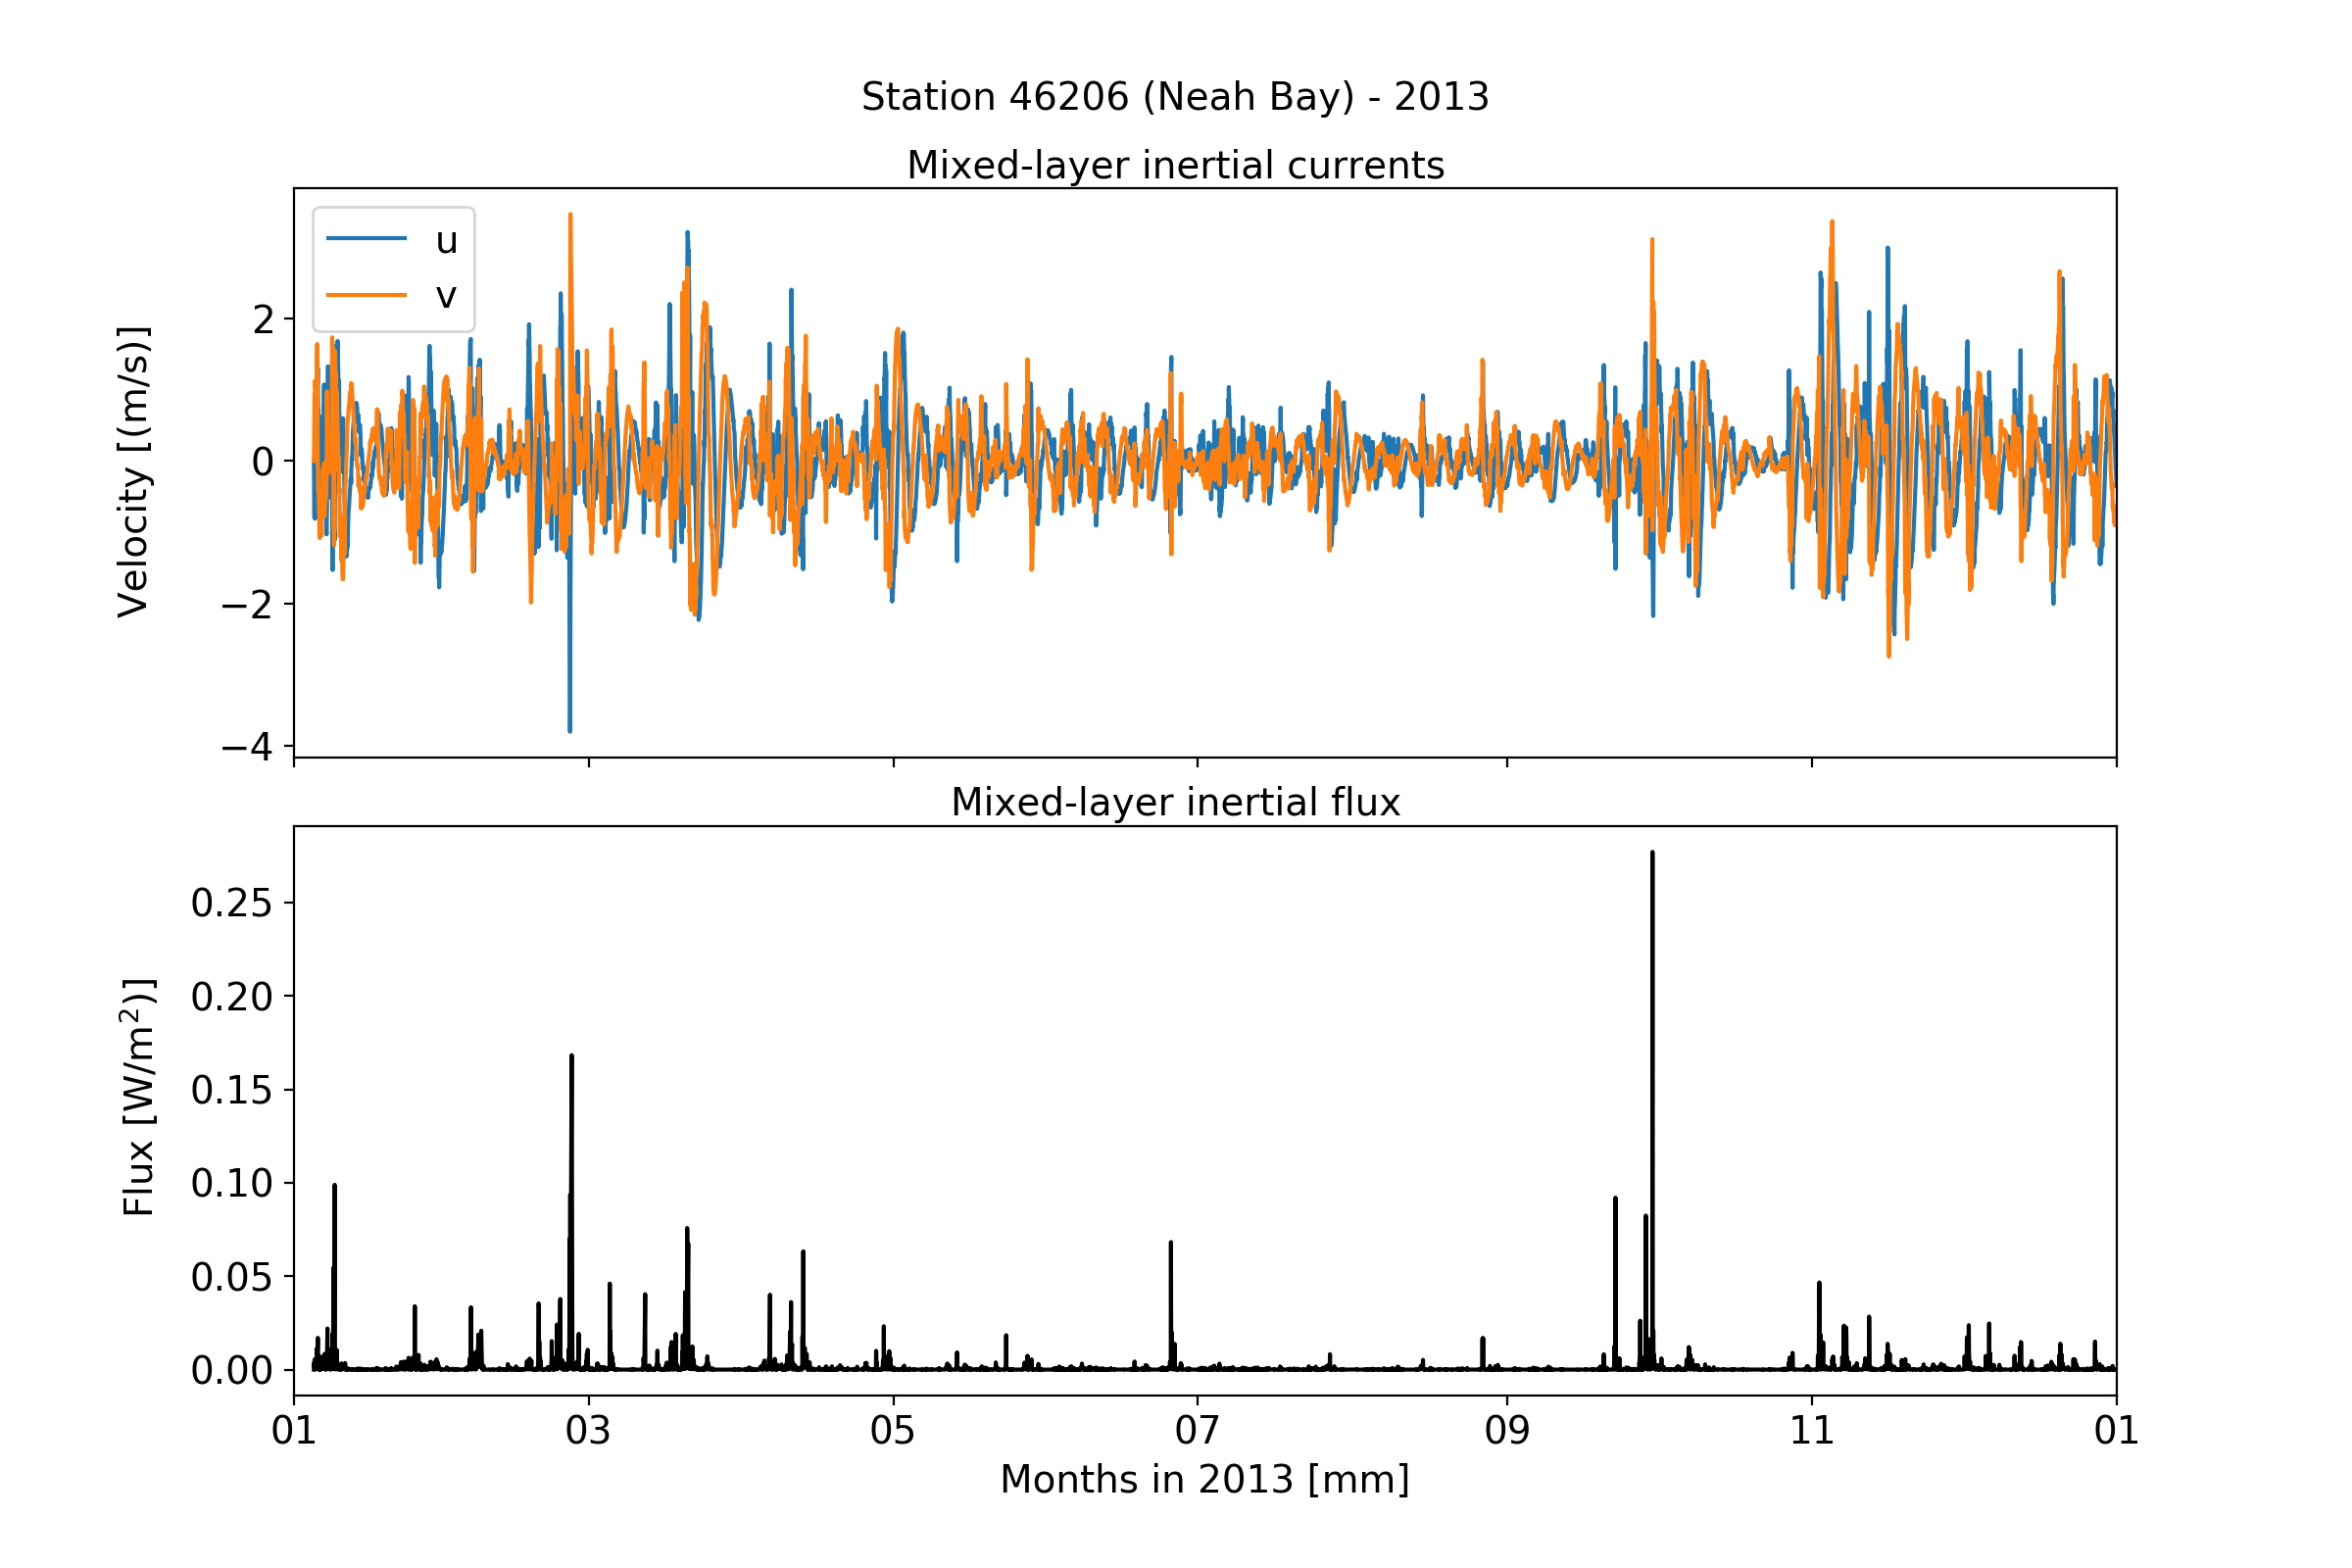

In [59]:
# plot inertial current data

fig, (ax0,ax1) = plt.subplots(2,1,figsize=(12,8),sharex=True)
fig.subplots_adjust(hspace=0.12)
fig.text(0.5, 0.93, f'Station 46206 (Neah Bay) - {t_stamp}', ha='center', fontsize=14)
fig.text(0.5, 0.886, f'Mixed-layer inertial currents', ha='center', fontsize=14)
fig.text(0.5, 0.48, f'Mixed-layer inertial flux', ha='center', fontsize=14)
fig.text(0.05, 0.7, f'Velocity [(m/s)]', va='center', rotation='vertical', fontsize=14)
fig.text(0.05, 0.3, f'Flux [W/m$^2$)]', va='center', rotation='vertical', fontsize=14)
ax1.set_xlabel(f'Months in {t_stamp} [mm]',fontsize=14)

for i in range(n_seg):
    if i == 0:
        ax0.plot(ds.dt2013,np.real(Zi),color='tab:blue',label='u')
        ax0.plot(ds.dt2013,np.imag(Zi),color='tab:orange',label='v')
        ax1.plot(ds.dt2013,Fi,color='black')
    elif i > 0:
        ax0.plot(ds.dt2013,np.real(Zi),color='tab:blue')
        ax0.plot(ds.dt2013,np.imag(Zi),color='tab:orange')
        ax1.plot(ds.dt2013,Fi,color='black')
        
date_form = pldates.DateFormatter("%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlim(start_date,end_date)
ax0.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)

ax0.legend(fontsize=14)
plt.show()

plt.savefig(fname=f'./inertial_currents_{t_stamp}.pdf',format='pdf')